In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouseDATA=pd.read_csv(mouse_drug_data_to_load)
clinicalDATA=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
MCData=mouseDATA.merge(clinicalDATA,on='Mouse ID')

# Display the data table for preview

MCData.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drugTimepoint=MCData.groupby(["Drug","Timepoint"]).mean()
drugTimepoint
# Convert to DataFrame
drugTimepointMean=pd.DataFrame(drugTimepoint["Tumor Volume (mm3)"])
# Preview DataFrame
drugTimepointMean.head(3)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
drugTimepoint_t=MCData.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
drugTimepointSTD=pd.DataFrame(drugTimepoint_t["Tumor Volume (mm3)"])

# Preview DataFrame
drugTimepointSTD


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
...                                 ...
Ramicane  0                    0.000000
          5                    0.482955
          10                   0.720225
          15                   0.770432
          20                   0.786199
          25                   0.746991
          30                   0.864906
          35                   0.967433
          40                   1.128445
          45                   1.226805
Stelasyn  0                    0.000000
          5                    0.239862
          10                   0.433678
          15                   0.493261
          20                   0.621889
          25                   0.741922
          30                   0.899548
          35                   1.003186
          40                   1.410435
          45                   1.576556
Zoniferol 0                    0.000000
          5                    0.188950
          10                   0.263949
          15                   0.370544
          20                   0.533182
          25                   0.602513
          30                   0.800043
          35                   0.881426
          40                   0.998515
          45                   1.003576

[100 rows x 1 columns]

In [4]:
# Minor Data Munging to Re-Format the Data Frames
tableMean=pd.pivot_table(drugTimepointMean, values='Tumor Volume (mm3)', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)
# Preview that Reformatting worked

tableMean.head()
tableMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


<Figure size 432x288 with 0 Axes>

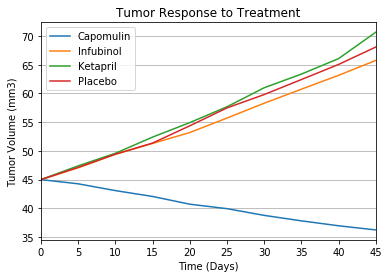

In [5]:
#plotting Drugs #1

plt.figure(); tableMean[["Capomulin", "Infubinol","Ketapril","Placebo"]].plot(); plt.legend(loc='best')    
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')
plt.show()


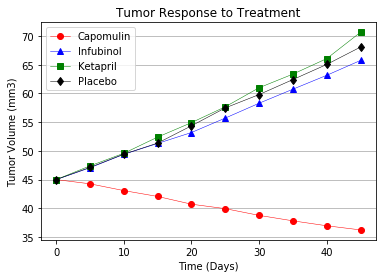

In [6]:
#defining axis:

x_axis=tableMean.index
y1=tableMean["Capomulin"]
y2=tableMean["Infubinol"]
y3=tableMean["Ketapril"]
y4=tableMean["Placebo"]

#plotting the axises
plt.plot(x_axis, y1,marker ='o', color='red', linewidth=0.5, label="Capomulin")
plt.plot(x_axis, y2,marker ='^', color='blue', linewidth=0.5, label="Infubinol")
plt.plot(x_axis, y3,marker ='s', color='green', linewidth=0.5, label="Ketapril")
plt.plot(x_axis, y4,marker ='d', color='black', linewidth=0.5, label="Placebo")
plt.grid(axis='y')

#adding legend and titles
plt.legend(loc='best') 
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame
drugTMetastatic=pd.DataFrame(drugTimepoint["Metastatic Sites"])

# Preview DataFrame
drugTMetastatic.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
drugTMetastaticMean=pd.pivot_table(drugTMetastatic, values='Metastatic Sites', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)
drugTMetastaticMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
drugTMetastaticSTD=pd.DataFrame(drugTimepoint_t["Metastatic Sites"])
# Convert to DataFrame
# Preview DataFrame
drugTMetastaticSTD.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

In [10]:
# Minor Data Munging to Re-Format the Data Frames

METAtableSTD=pd.pivot_table(drugTMetastaticSTD, values='Metastatic Sites', index=['Timepoint'],
                     columns=['Drug'], aggfunc=np.mean)

# Preview that Reformatting worked
METAtableSTD.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


<Figure size 432x288 with 0 Axes>

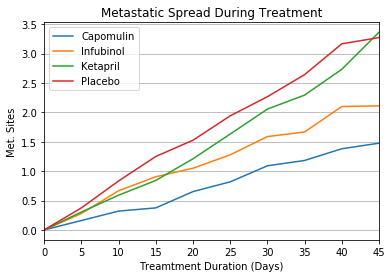

In [11]:
#plotting Metastatic #1

plt.figure(); drugTMetastaticMean[["Capomulin", "Infubinol","Ketapril","Placebo"]].plot(); plt.legend(loc='best')    
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treamtment Duration (Days)")
plt.ylabel("Met. Sites")

plt.grid(axis='y')
plt.show()

In [12]:
# Generate the Plot (with Error Bars)


# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [14]:
miceData=MCData.groupby(['Drug', 'Timepoint']).size().reset_index(name='counts')
miceData.head()

,Drug,Timepoint,counts
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
miceDataTable=pd.pivot_table(miceData, values='counts', index=['Timepoint'],
                     columns=['Drug'])

# Preview the Data Frame
miceDataTable



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


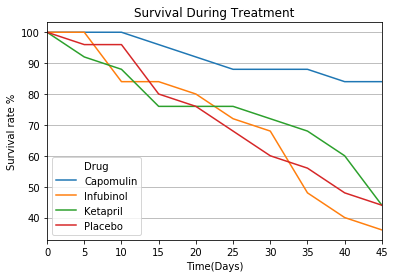

In [16]:
# Generate the Plot (Accounting for percentages)
miceDataTablePercentage=(miceDataTable/miceDataTable.iloc[0,:])*100

miceDataTablePercentage[["Capomulin", "Infubinol","Ketapril","Placebo"]].plot()
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival rate %")
plt.grid(axis='y')
# Save the Figure

# Show the Figure
plt.show()


## Summary Bar Graph

,Percent change of Tumor size
Drug,
Capomulin,-24.185502
Infubinol,31.564725
Ketapril,36.317412
Placebo,33.905256


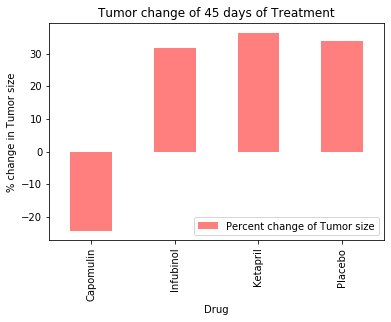

In [17]:
# Calculate the percent changes for each drug

# The percentage change is 
tableMean_reduced=tableMean[["Capomulin", "Infubinol","Ketapril","Placebo"]]

tumorchangePercent=((tableMean_reduced.loc[45]-tableMean_reduced.loc[0])/tableMean_reduced.loc[45])*100
tumorchangePercent=pd.DataFrame(data=tumorchangePercent,index=None,columns=["Percent change of Tumor size"])
tumorchangePercent
# Display the data to confirm
tumorchangePercent.plot(kind='Bar',color='r', alpha=0.5, align="center")
plt.title("Tumor change of 45 days of Treatment")
plt.xlabel("Drug")
plt.ylabel("% change in Tumor size")

tumorchangePercent

AttributeError: 'list' object has no attribute 'get_height'

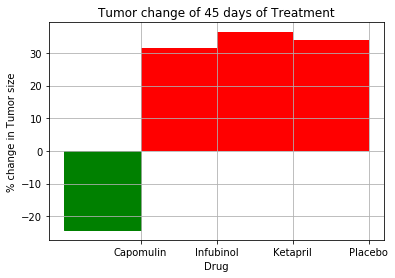

In [93]:
x_axis=[]
for x in tumorchangePercent.index:
    x_axis.append(x)
y=tumorchangePercent["Percent change of Tumor size"]
graph=plt.bar(x_axis, y, color='r', width=-1,align="edge")
graph[0].set_color('g')
plt.title("Tumor change of 45 days of Treatment")
plt.xlabel("Drug")
plt.ylabel("% change in Tumor size")
plt.grid()

#plt.text(0, 1, y, horizontalalignment='right',verticalalignment='baseline')

height = x_axis.get_height()


In [53]:
#Creating data labels
labels=[]
for i in y:
    v=round(i)
    labels.append(f"{v}%")
    
def autolabel(rects):
    
    for rect in rects:
        height = rect.get_height()
        graph.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(graph)

plt.show()


AttributeError: 'BarContainer' object has no attribute 'text'

In [47]:

#


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)